In [1]:
from sklearn.exceptions import ConvergenceWarning
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import split_X_y
from model_optimization import optimize_one_model

import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data')

## Import Labeled Data

In [3]:
data = pd.read_csv(os.path.join(DATA_DIR, 'ind4_clustering_10PCs.csv'))
data

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,cluster_label
0,-18.265232,0.179890,2.512753,-0.017214,-1.253427,5.103237,3.069733,-1.498417,-0.213276,-1.921352,B
1,-11.648572,-2.388439,0.988511,3.860645,1.748230,0.217374,-0.771974,0.272593,1.387455,-0.643988,B
2,2.597364,-1.249371,-3.363064,-2.655913,-1.898509,-0.066221,-3.849705,2.200412,-2.473733,-0.130113,L1
3,-3.417240,-4.438395,0.636533,3.351176,0.887752,-7.494596,-0.488962,0.585061,2.802112,-1.061658,B
4,7.382528,-0.940683,-9.480106,-6.126398,2.831281,1.671729,0.735573,-5.483888,3.156084,-4.968595,L1
...,...,...,...,...,...,...,...,...,...,...,...
4009,8.322987,-3.214379,-0.689009,-0.262546,1.024876,-2.575015,-1.277584,2.146089,1.676037,0.391478,L1
4010,-11.008588,-1.900832,-2.101015,2.335349,1.157123,-4.229745,0.003551,1.722289,-0.468227,2.221812,B
4011,9.320722,-5.689082,2.899196,2.080614,-1.207569,-1.014811,5.033344,2.736327,-3.361486,1.148018,L1
4012,7.061739,10.454308,7.367766,7.623241,1.983226,1.349209,-3.744541,-8.520135,2.017838,1.947278,L2


In [4]:
data['cluster_label'].value_counts()

cluster_label
L1              1931
B               1429
L2               572
Unclassified      82
Name: count, dtype: int64

In [5]:
data.describe()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
count,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000
mean,0.006364,-0.021141,-0.078401,0.083243,0.065213,0.008302,0.070433,-0.011541,-0.050991,-0.019961
std,8.610749,6.167741,4.481838,4.296681,3.434765,3.133784,2.905260,2.792151,2.708235,2.444898
min,-29.659653,-9.499155,-13.907784,-43.566033,-57.245970,-14.597362,-21.256365,-15.068132,-8.321540,-8.657476
25%,-7.966932,-3.430494,-2.636772,-1.408544,-0.966391,-1.665316,-1.810213,-1.357253,-1.739949,-1.497361
50%,3.099684,-1.893019,-0.082368,0.591807,0.255896,0.038975,0.065079,0.198538,-0.242970,-0.049414
75%,7.005078,-0.071587,2.207989,2.314132,1.397715,1.754820,2.037075,1.666112,1.390688,1.504905
max,17.917305,22.768726,34.417159,10.826321,10.860815,11.885671,8.529058,11.644395,20.034509,9.515228


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PC_1           4014 non-null   float64
 1   PC_2           4014 non-null   float64
 2   PC_3           4014 non-null   float64
 3   PC_4           4014 non-null   float64
 4   PC_5           4014 non-null   float64
 5   PC_6           4014 non-null   float64
 6   PC_7           4014 non-null   float64
 7   PC_8           4014 non-null   float64
 8   PC_9           4014 non-null   float64
 9   PC_10          4014 non-null   float64
 10  cluster_label  4014 non-null   object 
dtypes: float64(10), object(1)
memory usage: 345.1+ KB


## PreProcessing

Split X, y and turn labels from string to int with values in range (0, n_classes-1).

In [7]:
X, y = split_X_y(data)
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-18.265232,0.179890,2.512753,-0.017214,-1.253427,5.103237,3.069733,-1.498417,-0.213276,-1.921352
1,-11.648572,-2.388439,0.988511,3.860645,1.748230,0.217374,-0.771974,0.272593,1.387455,-0.643988
2,2.597364,-1.249371,-3.363064,-2.655913,-1.898509,-0.066221,-3.849705,2.200412,-2.473733,-0.130113
3,-3.417240,-4.438395,0.636533,3.351176,0.887752,-7.494596,-0.488962,0.585061,2.802112,-1.061658
4,7.382528,-0.940683,-9.480106,-6.126398,2.831281,1.671729,0.735573,-5.483888,3.156084,-4.968595
...,...,...,...,...,...,...,...,...,...,...
4009,8.322987,-3.214379,-0.689009,-0.262546,1.024876,-2.575015,-1.277584,2.146089,1.676037,0.391478
4010,-11.008588,-1.900832,-2.101015,2.335349,1.157123,-4.229745,0.003551,1.722289,-0.468227,2.221812
4011,9.320722,-5.689082,2.899196,2.080614,-1.207569,-1.014811,5.033344,2.736327,-3.361486,1.148018
4012,7.061739,10.454308,7.367766,7.623241,1.983226,1.349209,-3.744541,-8.520135,2.017838,1.947278


## NestedCV to optimize each model and compare them

In [8]:
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score, fbeta_score, f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

NUM_TRIALS = 5

scoring = {'F1_weighted': make_scorer(f1_score, average='weighted'),
           'F1_micro': make_scorer(f1_score, average='micro'),
           'F1_macro': make_scorer(f1_score, average='macro'),
           'F2_weighted': make_scorer(fbeta_score, beta=2, zero_division=0, average='weighted'),
           'F2_micro': make_scorer(fbeta_score, beta=2, zero_division=0, average='micro'),
           'F2_macro': make_scorer(fbeta_score, beta=2, zero_division=0, average='macro'),
           'MCC': make_scorer(matthews_corrcoef),
           'Balanced_Accuracy': 'balanced_accuracy',
           }

def get_outer_scores(y_true, y_pred, results_df, idx):
    """
    Fill the dataframe which will contain all the scores for each experiment of a specific classifier

    :param y_true: True labels
    :param y_pred: Predicted labels by the best estimator of each inner cv
    :param results_df: The dataframe to fill
    :param idx: The index the results should be put
    :return: The dataframe filled at the indicated index
    """
    results_df['MCC'].loc[idx] = matthews_corrcoef(y_true, y_pred)
    results_df['F1_weighted'].loc[idx] = f1_score(y_true, y_pred, average='weighted')
    results_df['F1_micro'].loc[idx] = f1_score(y_true, y_pred, average='micro')
    results_df['F1_macro'].loc[idx] = f1_score(y_true, y_pred, average='macro')
    results_df['F2_weighted'].loc[idx] = fbeta_score(y_true, y_pred, beta=2, zero_division=0, average='weighted')
    results_df['F2_micro'].loc[idx] = fbeta_score(y_true, y_pred, beta=2, zero_division=0, average='micro')
    results_df['F2_macro'].loc[idx] = f1_score(y_true, y_pred, average='macro')
    results_df['Balanced_Accuracy'].loc[idx] = balanced_accuracy_score(y_true, y_pred)

    return results_df.copy()

def run_ncv(data_x, labels, clf_name):
    """
    Run an NCV experiment for a specific classifier whose name is required as input

    :param data_x: Dataframe of samples and features
    :param labels: numpy array of labels
    :param clf_name: a string indicating the name of the classifier
    :return: tuple
        Result scores of all experiments in a dataframe (experiment_number x score) and a list with the best parameters
        for each experiment just for inspection (DO NOT USE)
    """
    # scaler = StandardScaler()
    # scaled_data_x = scaler.fit_transform(data_x, labels)

    trial_results_df = pd.DataFrame(columns=scoring.keys(), index=[i for i in range(NUM_TRIALS)])
    best_params_list = []
    for num_trial in range(NUM_TRIALS):
        outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=num_trial)
        # count = 0
        for train_ix, test_ix in outer_cv.split(data_x, labels):
            # print(train_ix)
            x_train, x_test = data_x.loc[train_ix], data_x.loc[test_ix]
            y_train, y_test = labels[train_ix], labels[test_ix]

            # count += 1
            seed = num_trial

            best_estimator, best_params = optimize_one_model(x_train, y_train, clf_name, seed)

            best_params_list.append(best_params)
            y_pred = best_estimator.predict(x_test)
            trial_results_df = get_outer_scores(y_test, y_pred, trial_results_df.copy(), num_trial)
    # print(best_params_list)

    return trial_results_df, best_params_list

def run_all_classifiers(data, targets):
    """
    START HERE
    Begin the nested cv experiment here. This function iterates over all classifier names and starts a ncv experiment for
    each one.

    :param data: A dataframe containing the features for all available samples (aka PCs)
    :param targets: The labels after turning them into numbers of range 0 to num_classes-1
    :return: Tuple
        A dictionary with keys the names of the classifiers and values the dataframes containing the scores for each,
        A dictionary containing the best params for each experiment and each classifier (Only used for inspection)
    """
    results_dict = {}
    params_dict = {}
    classifiers = {0: 'svm',
                   1: 'lr',
                   2: 'gnb'
                   }

    for clf in classifiers.values():
        print(f'Starting NCV experiment for classifier {clf}')
        # res_df = nested_cv(clf, hyperparam_grids[key], x, y)
        res_df, best_params = run_ncv(data, targets, clf)
        results_dict[clf] = res_df
        params_dict[clf] = best_params
        # break
    return results_dict, params_dict

## Plotting functions

In [9]:
def plot_clfs_metrics(results_dict):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
    my_palette = sns.color_palette("Set3")

    row, col = 0, 0
    for metric in scoring.keys():
        metric_data = pd.DataFrame()
        for clf_key, df in results_dict.items():
            metric_data[clf_key.upper()] = df[metric]
        sns.boxplot(data=metric_data, ax=axes[row][col], width=0.5, palette=my_palette)
        axes[row][col].set_title(metric)

        col += 1
        if col == 2:
            col = 0
            row += 1

    fig.subplots_adjust(hspace=0.6, wspace=0.3)
    fig.suptitle('Classifiers metrics comparison after nested CV experiments', fontsize=22)
    plt.savefig('metrics_comparison.pdf')
    plt.show()


def plot_mccs(mcc_dict):
    fig, ax = plt.subplots(figsize=(16, 14))
    x_labels = [key.upper() for key in mcc_dict.keys()]
    y_values = mcc_dict.values()
    my_cmap = plt.get_cmap("Set3")
    plt.bar(x_labels, y_values, color=my_cmap.colors)
    plt.title('MCC mean values comparison between different classifiers', fontsize=22)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.bar_label(ax.containers[0])
    plt.xlabel('Classifiers', fontsize=20)
    plt.savefig('mcc_compare.pdf')
    plt.show()


def plot_mean_std_errors(std_dict):
    fig, ax = plt.subplots(figsize=(16, 14))
    x_labels = [key.upper() for key in std_dict.keys()]
    y_values = std_dict.values()
    my_cmap = plt.get_cmap("Set3")
    plt.bar(x_labels, y_values, color=my_cmap.colors)
    plt.title('MCC standard error comparison between different classifiers', fontsize=22)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.bar_label(ax.containers[0])
    plt.xlabel('Classifiers', fontsize=20)
    plt.savefig('std_e_compare.pdf')
    plt.show()


def compare_mean_mccs(results_dict):
    """
    For each classifier calculate mean MCC score and standard error
    :param results_dict: A dictionary with keys the names of the classifiers and values dataframes with the scores of
    the ncv experiments done for each one
    :return:
    Dictionary for each classifier's mean MCC score
    """
    mccs = {}
    std_errors = {}
    for key, df in results_dict.items():
        mean_mcc = df['MCC'].mean()
        std_error_mcc = df['MCC'].std(ddof=1) / np.sqrt(df['MCC'].shape[0])
        mccs[key] = mean_mcc
        std_errors[key] = std_error_mcc
    plot_mccs(mccs)
    plot_mean_std_errors(std_errors)
    return mccs

In [10]:
X.shape

(4014, 10)

In [11]:
X.loc[[0,1,2,3]]

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-18.265232,0.179890,2.512753,-0.017214,-1.253427,5.103237,3.069733,-1.498417,-0.213276,-1.921352
1,-11.648572,-2.388439,0.988511,3.860645,1.748230,0.217374,-0.771974,0.272593,1.387455,-0.643988
2,2.597364,-1.249371,-3.363064,-2.655913,-1.898509,-0.066221,-3.849705,2.200412,-2.473733,-0.130113
3,-3.417240,-4.438395,0.636533,3.351176,0.887752,-7.494596,-0.488962,0.585061,2.802112,-1.061658


In [ ]:
results, params_dict = run_all_classifiers(X,y)

Starting NCV experiment for classifier svm


  0%|          | 0/25 [00:00<?, ?it/s]

/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-pro

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [16]:
for key, value in params_dict.items():
    print(f'Params for classifier {key}')
    for idx, param in enumerate(value):
        print(f'Params of trial {idx}: {param}')

Params for classifier svm
Params of trial 0: {'c_svm': 4.4794650196319825, 'gamma_svm': 0.04902611484570637}
Params of trial 1: {'c_svm': 3.3250459763194784, 'gamma_svm': 0.053896674576094955}
Params of trial 2: {'c_svm': 3.055821610490155, 'gamma_svm': 0.07881606243387812}
Params of trial 3: {'c_svm': 1.7414653197218566, 'gamma_svm': 0.07345957162043314}
Params of trial 4: {'c_svm': 5.4297540628645855, 'gamma_svm': 0.038657833945232666}
Params of trial 5: {'c_svm': 2.1590594772194964, 'gamma_svm': 0.08373091749185892}
Params of trial 6: {'c_svm': 2.6828863523483184, 'gamma_svm': 0.0672331845653257}
Params of trial 7: {'c_svm': 9.409002237982001, 'gamma_svm': 0.057433128720848964}
Params of trial 8: {'c_svm': 9.14811564332191, 'gamma_svm': 0.029565601500160292}
Params of trial 9: {'c_svm': 5.771774852487372, 'gamma_svm': 0.06200149402066832}
Params of trial 10: {'c_svm': 4.6451688410493714, 'gamma_svm': 0.06927015159926765}
Params of trial 11: {'c_svm': 4.5462361801116975, 'gamma_svm':

## Check MCC scores to compare algorithms

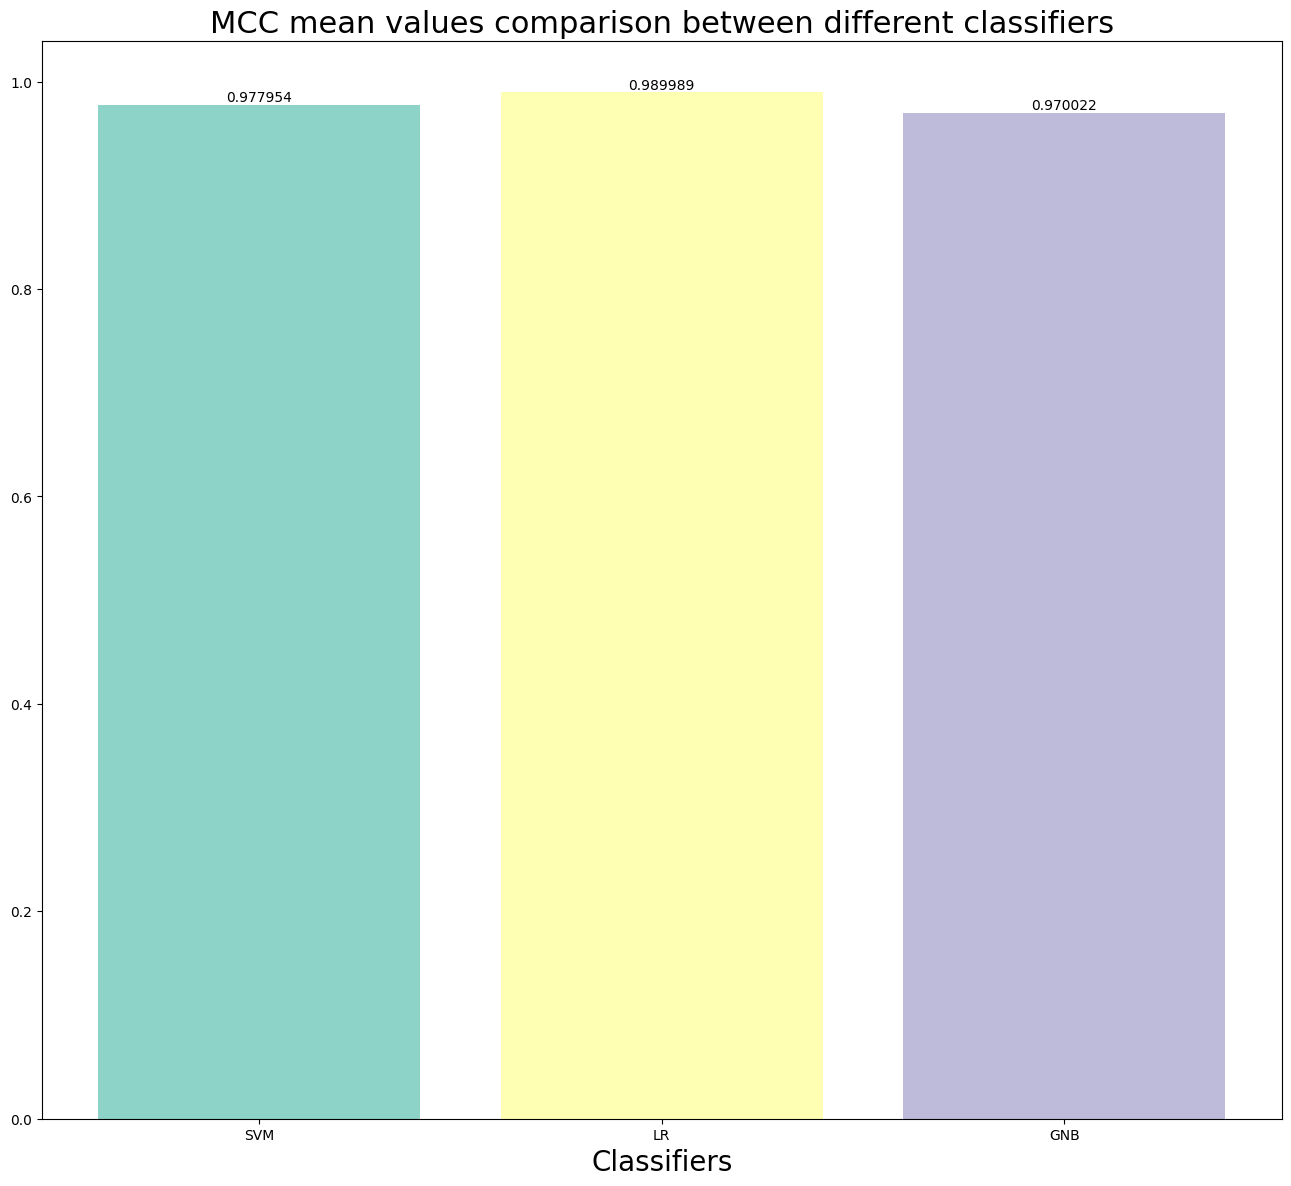

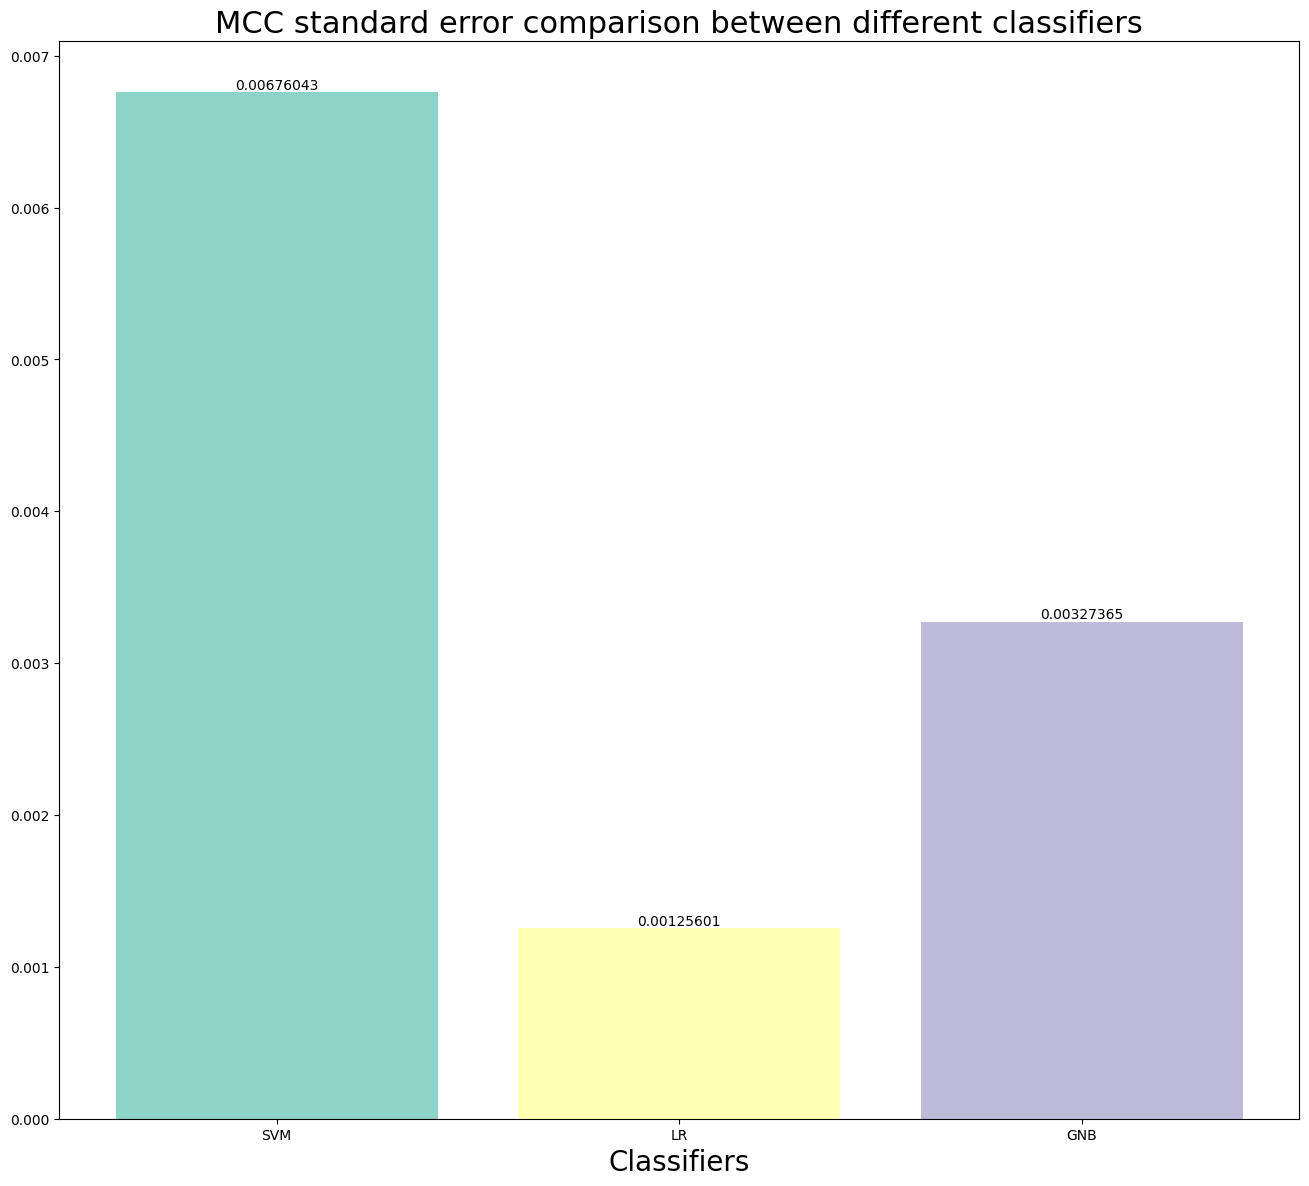

{'svm': 0.9779538885691694,
 'lr': 0.9899885164282546,
 'gnb': 0.9700223782727532}

In [17]:
mccs_dict = compare_mean_mccs(results)
mccs_dict

## Check boxplots of all other collected metrics for all classifiers

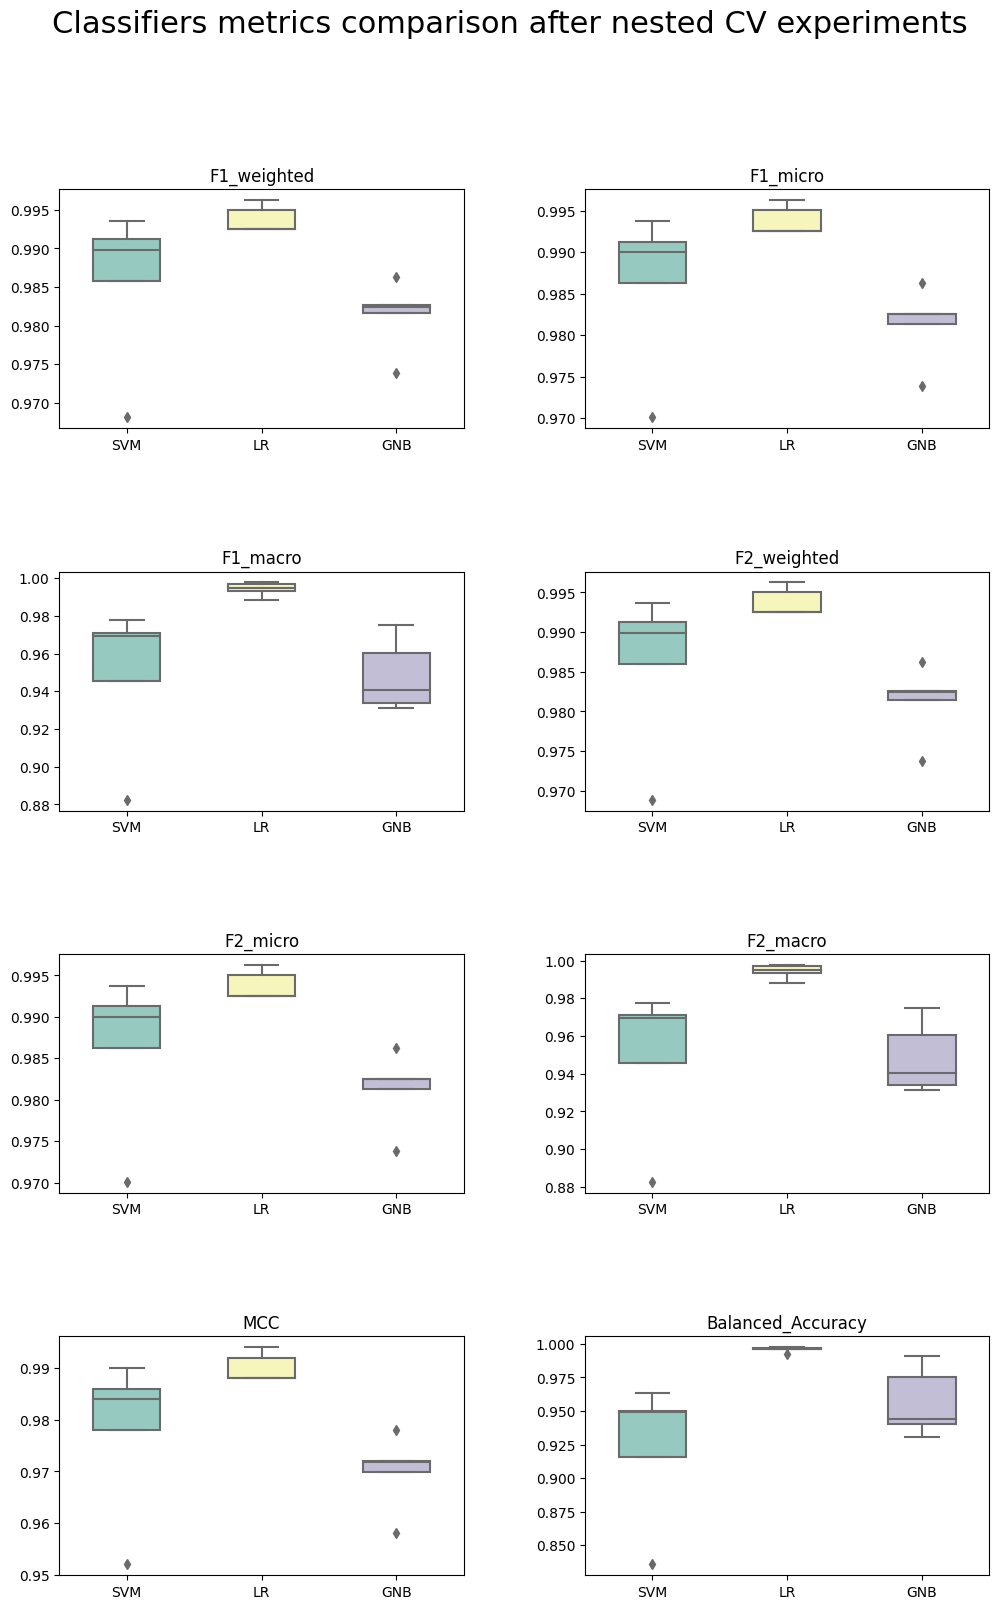

In [18]:
plot_clfs_metrics(results)